Let's do this with MatchIt since optmatch is completely annoying

In [1]:
library(MatchIt)

Loading required package: MASS


In [2]:
# Set up the paths
csv_path = '/data1/abide/Pheno/full_merged_pheno.csv'
out_path = '/data1/abide/Pheno/psm_full_matched_sample.csv'

In [3]:
# Read the data
data = read.csv(csv_path)

In [4]:
# Remap the values of the diagnosis column
# This will change the meaning, now ASD = 1, TDC = 0
data$DX_GROUP[data$DX_GROUP == 2] <- 0

In [23]:
# Make a subset for only male participants
data_male = subset(data, SEX==1)

In [291]:
# Make a copy for non-nan values for FIQ and SRS
data_fiq = data[!is.na(data$FIQ),]
data_srs = data[!is.na(data$SRS_RAW_TOTAL),]

data_male_fiq = data_male[!is.na(data_male$FIQ),]
data_male_srs = data_male[!is.na(data_male$SRS_RAW_TOTAL),]

In [292]:
head(data_male)

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,⋯,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,frames_scrubbed,frames_OK,FD,FD_scrubbed,ADOS_SOCOM_SEV,ADOS_STBEH_SEV
1,CALTECH,51456,1,4,55.4,1,R,NA,126,118,⋯,NA,2,NA,NA,95,55,0.4345934683,0.3281214555,6,6
2,CALTECH,51457,1,4,22.9,1,Ambi,NA,107,119,⋯,NA,2,NA,NA,16,134,0.2071597236,0.1708927533,4,5
3,CALTECH,51458,1,1,39.2,1,R,NA,93,80,⋯,NA,2,NA,NA,18,132,0.3228049816,0.2888724095,9,6
4,CALTECH,51459,1,1,22.8,1,R,NA,106,94,⋯,NA,2,NA,NA,0,150,0.1529627835,0.1529627835,6,1
6,CALTECH,51461,1,4,37.7,1,R,NA,99,111,⋯,NA,2,NA,NA,64,86,0.3912927142,0.2888612263,NA,NA
9,CALTECH,51464,1,1,20.9,1,Ambi,NA,101,118,⋯,NA,2,NA,NA,0,150,0.1494188822,0.1494188822,NA,NA


In [6]:
# Get the column names
names(data)

[1] "SITE_ID"                         "SUB_ID"                         
 [3] "DX_GROUP"                        "DSM_IV_TR"                      
 [5] "AGE_AT_SCAN"                     "SEX"                            
 [7] "HANDEDNESS_CATEGORY"             "HANDEDNESS_SCORES"              
 [9] "FIQ"                             "VIQ"                            
[11] "PIQ"                             "FIQ_TEST_TYPE"                  
[13] "VIQ_TEST_TYPE"                   "PIQ_TEST_TYPE"                  
[15] "ADI_R_SOCIAL_TOTAL_A"            "ADI_R_VERBAL_TOTAL_BV"          
[17] "ADI_RRB_TOTAL_C"                 "ADI_R_ONSET_TOTAL_D"            
[19] "ADI_R_RSRCH_RELIABLE"            "ADOS_MODULE"                    
[21] "ADOS_TOTAL"                      "ADOS_COMM"                      
[23] "ADOS_SOCIAL"                     "ADOS_STEREO_BEHAV"              
[25] "ADOS_RSRCH_RELIABLE"             "ADOS_GOTHAM_SOCAFFECT"          
[27] "ADOS_GOTHAM_RRB"                 "ADOS_GOTHAM_TOTAL"              
[29] "ADOS_GOTHAM_SEVERITY"            "SRS_VERSION"                    
[31] "SRS_RAW_TOTAL"                   "SRS_AWARENESS"                  
[33] "SRS_COGNITION"                   "SRS_COMMUNICATION"              
[35] "SRS_MOTIVATION"                  "SRS_MANNERISMS"                 
[37] "SCQ_TOTAL"                       "AQ_TOTAL"                       
[39] "COMORBIDITY"                     "CURRENT_MED_STATUS"             
[41] "MEDICATION_NAME"                 "OFF_STIMULANTS_AT_SCAN"         
[43] "VINELAND_RECEPTIVE_V_SCALED"     "VINELAND_EXPRESSIVE_V_SCALED"   
[45] "VINELAND_WRITTEN_V_SCALED"       "VINELAND_COMMUNICATION_STANDARD"
[47] "VINELAND_PERSONAL_V_SCALED"      "VINELAND_DOMESTIC_V_SCALED"     
[49] "VINELAND_COMMUNITY_V_SCALED"     "VINELAND_DAILYLVNG_STANDARD"    
[51] "VINELAND_INTERPERSONAL_V_SCALED" "VINELAND_PLAY_V_SCALED"         
[53] "VINELAND_COPING_V_SCALED"        "VINELAND_SOCIAL_STANDARD"       
[55] "VINELAND_SUM_SCORES"             "VINELAND_ABC_STANDARD"          
[57] "VINELAND_INFORMANT"              "WISC_IV_VCI"                    
[59] "WISC_IV_PRI"                     "WISC_IV_WMI"                    
[61] "WISC_IV_PSI"                     "WISC_IV_SIM_SCALED"             
[63] "WISC_IV_VOCAB_SCALED"            "WISC_IV_INFO_SCALED"            
[65] "WISC_IV_BLK_DSN_SCALED"          "WISC_IV_PIC_CON_SCALED"         
[67] "WISC_IV_MATRIX_SCALED"           "WISC_IV_DIGIT_SPAN_SCALED"      
[69] "WISC_IV_LET_NUM_SCALED"          "WISC_IV_CODING_SCALED"          
[71] "WISC_IV_SYM_SCALED"              "EYE_STATUS_AT_SCAN"             
[73] "AGE_AT_MPRAGE"                   "BMI"                            
[75] "frames_scrubbed"                 "frames_OK"                      
[77] "FD"                              "FD_scrubbed"                    
[79] "ADOS_SOCOM_SEV"                  "ADOS_STBEH_SEV"

In [9]:
table(data$DX_GROUP)


  0   1 
426 397 

In [10]:
# Get the Site IDs
unique(data$SITE_ID)

[1] CALTECH  CMU      KKI      LEUVEN_2 MAX_MUN  NYU      OHSU     OLIN    
 [9] PITT     SBL      SDSU     STANFORD UCLA_1   UCLA_2   USM     
15 Levels: CALTECH CMU KKI LEUVEN_2 MAX_MUN NYU OHSU OLIN PITT SBL ... USM

In [127]:
drop_sites = c('CMU', 'OHSU', 'OLIN', 'UCLA_2')
maybe_sites = c('KKI', 'LEUVEN_2' )
use_sites = c('PITT', 'NYU', 'SBL', 'SDSU', 'STANFORD', 'UCLA_1')

In [548]:
# Slice the dataset and get just that of the current site
# 'FIQ', 'VIQ', 'PIQ',s
site = 'USM'
covariates = c('SITE_ID','SUB_ID', 'DX_GROUP', 'AGE_AT_SCAN', 'FD_scrubbed', 'frames_scrubbed')#, 'FIQ')
slice_data = subset(data_male, SITE_ID==site, select=covariates)

In [ ]:
slice_data = subset(data_male, SITE_ID==site, select=covariates)

In [549]:
# Check for nasty ass missing values
sapply(slice_data, function(x) sum(is.na(x)))

SITE_ID          SUB_ID        DX_GROUP     AGE_AT_SCAN     FD_scrubbed 
              0               0               0               0               0 
frames_scrubbed 
              0

In [550]:
table(slice_data$DX_GROUP)


 0  1 
43 58 

In [551]:
# Perform the nearest neighbour matching
matched = matchit(DX_GROUP ~ FD_scrubbed + AGE_AT_SCAN, data=slice_data, method="nearest", caliper=0.2, ratio=1)

Warning message:
In matchit2nearest(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, : Fewer control than treated units and matching without replacement.  Not all treated units will receive a match.  Treated units will be matched in the order specified by m.order: largest

In [552]:
summary(matched)


Call:
matchit(formula = DX_GROUP ~ FD_scrubbed + AGE_AT_SCAN, data = slice_data, 
    method = "nearest", caliper = 0.2, ratio = 1)

Summary of balance for all data:
            Means Treated Means Control SD Control Mean Diff eQQ Med eQQ Mean
distance           0.5825        0.5632     0.0633    0.0193  0.0132   0.0191
FD_scrubbed        0.1810        0.1702     0.0419    0.0108  0.0113   0.0134
AGE_AT_SCAN       22.6492       21.3602     7.6424    1.2890  0.9172   1.4418
            eQQ Max
distance     0.0539
FD_scrubbed  0.0365
AGE_AT_SCAN 10.8282


Summary of balance for matched data:
            Means Treated Means Control SD Control Mean Diff eQQ Med eQQ Mean
distance           0.5611        0.5560     0.0558    0.0050  0.0049   0.0059
FD_scrubbed        0.1640        0.1658     0.0377   -0.0018  0.0039   0.0049
AGE_AT_SCAN       22.3032       20.9309     7.6171    1.3723  1.1034   1.8805
            eQQ Max
distance     0.0133
FD_scrubbed  0.0178
AGE_AT_SCAN 10.8282

Percent B

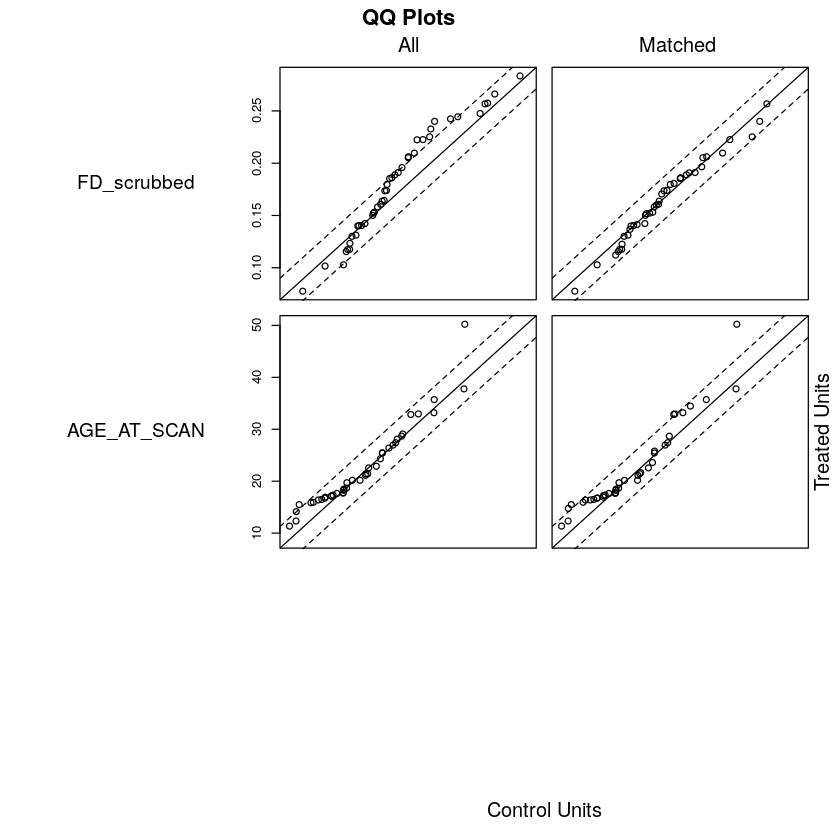

In [553]:
plot(matched)

In [464]:
data_matched = match.data(matched)

In [271]:
data_matched

,SITE_ID,SUB_ID,DX_GROUP,AGE_AT_SCAN,FD_scrubbed,frames_scrubbed,distance,weights
2,CALTECH,51457,1,22.9,0.1708927533,16,0.450790180006652,1
3,CALTECH,51458,1,39.2,0.2888724095,18,0.607199520772294,1
4,CALTECH,51459,1,22.8,0.1529627835,0,0.427102205550897,1
9,CALTECH,51464,1,20.9,0.1494188822,0,0.422456026192514,1
10,CALTECH,51465,1,20.2,0.1719730574,0,0.452225674369603,1
13,CALTECH,51468,1,20.1,0.2196887756,5,0.516080062148338,1
14,CALTECH,51469,1,45.1,0.2462895182,99,0.551583799995423,1
17,CALTECH,51472,1,17.5,0.1650988662,0,0.443105885431555,1
18,CALTECH,51473,1,21.2,0.1833053966,26,0.467327371489769,1
21,CALTECH,51476,0,39.3,0.190310245,0,0.476693990322546,1
